##### 샘플 데이터

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\강의\DCX_미니프로젝트강의\Day_1 actor\한글 크롤링.csv")
df

,Date,Name,Score,Review,like
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0
...,...,...,...,...,...
6275,2019년 12월 14일,김영진,5,좋네요,0
6276,2020년 1월 29일,이세화,5,좋아요,0
6277,2017년 8월 22일,Google 사용자,5,짱좋아요 ♡-♡♡^^,0
6278,2020년 1월 1일,김희진,5,좋아요~~~,0


# ◆ 1. 데이터 전처리하기
* 1.1. 알파벳, 숫자, 공백, 한글 문자를 제외한 모든 문자를 매칭 + . / ! / ?
* 1.2. 의미없는 짧은 글 제거

### 1.1. 특수문자 및 숫자 제거
    *정규표현식 사용

In [2]:
import re #정규표현식

In [3]:
#알파벳, 숫자, 공백, 한글 문자를 제외한 모든 문자를 매칭 + . / ! / ?
pattern1 = re.compile(r'[^a-zA-Z0-9\s가-힣\.\!\?]')
text = '★ DCX 프로젝트 중입니다★★★★★★★LGTHinQ'

text = re.sub(pattern1, ' ', text)

pattern2 = re.compile(r'\s+')
re.sub(pattern2, ' ', text)

' DCX 프로젝트 중입니다 LGTHinQ'

In [8]:
def re_review(string):
    pattern = re.compile(r'[^a-zA-Z0-9\s가-힣\.\!\?]')
    string = re.sub(pattern, ' ', string)

    pattern2 = re.compile(r'\s+')
    result = re.sub(pattern2, ' ', string)
    return result

In [12]:
import pandas as pd
df = pd.read_pickle("/Users/harry/LG DX SCHOOL/dx-project/텍스트 마이닝/merged_processed.pkl")
df['re_content'] = df['merged_content'].apply(lambda x : re_review(x))
df['re_comment'] = df['comment'].fillna('').apply(lambda x : re_review(x))

In [17]:
if 'date' in df.columns:
    df = df.drop(columns=['comment'])
    df = df.drop(columns=['merged_content'])
else:
    print("열 없음")

output_path = '/Users/harry/LG DX SCHOOL/dx-project/텍스트 마이닝/shower_processed.pkl'
df.to_pickle(output_path)


열 없음


### 1.2. 의미없는 짧은 글 제거

In [20]:
#1. drop
df = pd.read_pickle("/Users/harry/LG DX SCHOOL/dx-project/텍스트 마이닝/shower_processed.pkl")
for n, i in enumerate(df['re_comment']):
    if len(i) < 15:
        df = df.drop([n])

In [21]:
#2. apply
df = df[df['re_comment'].apply(lambda x : len(x) > 15)]

In [22]:
df = df.reset_index(drop=True)
df

,re_content,re_comment
0,아내한테 씻는거 까지 얘기해야하나요제왕절개 후 샤워 질문이요 안 씻으면 냄새나는 타...,아니 근데 침대에 누울 땐 씻고 누워야 하는 거 아니야? 냄새난다고해 나도 연애때...
1,결혼식 답례품마라톤 당일 아침 샤워 브라이덜샤워 해주고 간단히 웨딩드레스 골라준 댓...,장기적으로 보면 형한테 이득이긴 한데 n사진보니 개빡치기는 하네 저게 뭐여.. 누...
2,원정 수영장 추천해주세요독감주사 샤워 바로 해도 괜찮은가요?? 서울이면 좋고요채광 ...,독감주사 샤워 바로하기 보다는 좀 찝찝해도 하루 참고 내일 하세요.. 독감주사 샤...
3,전자담배 피는 남자들남부 라페스타 힐튼 샤워필터 필수!!! 전담 보통 화장실이나 샤...,전담도 냄새나는데 전담은 아하면서 피는사람존많 전담은 냄새덜나니까 가능하지않을까?...
4,남친한테 이런걸로 뭐라하면 쪼잔한가?매일굽는 샤워도우 내가 유일하게 관심있고 좋아하...,투껑 닫으라 정도까진 할듯 투껑은 뭐임 뚜껑 두개? Two껑? 지금 본문 내용을 ...
...,...,...
707,세수하고나면 건조한데 기름 쩌는 여드름피부들 봐라샤워필터 필수 여드름도 나고 기름기...,그래서 난 잘때만 바르는데 n이거 조음.. 얇게 잘 펴바르는게 꿀팁.. n진정되고...
708,더러움주의 오늘 대변실수한 어린이 씻겼는데 아직도 냄새가 나는것만같아찬물 샤워하니 ...,화이팅 .. 초등교사가 배변지도까지 해야한다는거 진짜 존경스럽더라 .. 물론 지금...
709,와시 어제 잠 안와서 한 2시간도 못잤더니내돈내산 폴리베베 샤워핸들 후기 엄청 잠오...,제발 오늘은 누우면 7시간 이상은 자 제발 2시간 수면이면 오늘 하루종일 좀비모드...
710,햐 재수가 없는건가?개인 샤워필터 필요 없는 녹물필터필트리오 4개월 사용 후기 내 ...,소변은 사실 세균도 없고 깨끗하대... 위안삼아.. 너무 스트레스 받아서.. 기분...


# ◆ 2. 데이터 형태소 분리하기
* 2.1 불용어적용 및 형태소 분리
* 2.2 데이터 프레임에 추가

In [25]:
from konlpy.tag import Okt
okt=Okt()

In [26]:
#불용어가져오기
stopwords_df = pd.read_csv(r'D:\강의\DCX_미니프로젝트강의\Day_1 actor\ko-stopwords.csv')
stopwords = set(stopwords_df['stopwords'])
stopwords

{'가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


### 2.1. 불용어적용 및 형태소 분리
    *제공되는 한국어 불용어 파일 사용(ko-stopwords.csv)

In [28]:
'Noun', 'Adjective', 'Verb'

('Noun', 'Adjective', 'Verb')

In [32]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)
    result = [word for word, tag in pos_words if word not in stopwords if tag in {'Noun', 'Adjective', 'Verb'}]
    return result

### 2.2 데이터 프레임에 추가

In [100]:
from tqdm import tqdm
tqdm.pandas()

In [102]:
df['tagged_review'] = df['re_review'].progress_apply(lambda x : okt_pos_tagging(x))
df

100%|██████████| 3468/3468 [00:23<00:00, 150.03it/s]


,Date,Name,Score,Review,like,re_review,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.30007085, -0.4546936, 1.1461264, -1.37467,...",2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-1.1479983, -0.98295224, 0.65881485, -1.05129...",1
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[2.7407956, -0.14221147, -1.2591997, 1.8564236...",3
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.96180373, -0.03830146, -0.68201995, -0.468...",1
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[0.6561136, -0.93339473, -0.40496543, -0.45242...",3
...,...,...,...,...,...,...,...,...,...
3463,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[0.04648971, 0.08567434, 0.04798103, 0.1091906...",1
3464,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[0.7911792, -0.15556675, -0.37034857, -0.25448...",1
3465,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,어플이 더위먹었나? 잘되다가 안되네...,"[어플, 더위, 먹다, 안되다]","[-0.030880047, -0.22810432, -0.122361846, 0.30...",0
3466,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,짱!! 밖에 나가도 되니까 진짜 좋아요!,"[짱, 나가다, 진짜, 좋다]","[0.47834617, -0.23259656, -0.56771076, 0.09145...",1


# ◆ 3. 벡터화
* 3.1 doc2vec 준비(문서의 순서 매기기)
* 3.2 doc2vec 학습시키기
* 3.3 벡터 값 데이터 프레임에 추가

In [37]:
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

### 3.1 doc2vec 준비
    - word2vec은 단어 하나를 하나의 vector화
    - doc2vec은 문서 하나를 하나의 vector화

In [39]:
tagged_corpus_list = []

for n, i in enumerate(df['tagged_review']):
    tag = "document{}".format(n)
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = i))

In [40]:
tagged_corpus_list[0]

TaggedDocument(words=['시스템', '에어컨', '대다', '연결하다', '격', '제어', '사용', '에어컨', '기능', '공기청정기', '능', '앱', '모드', '청정', '모드', '없다', '냉방', '습', '송풍', '난방', '자동', '만', '청정', '없다', '리모컨', '청정', '누르다', '앱', '송풍', '데', '앱', '송풍', '선택', '청정', '않다', '리모컨', '송풍', '청정', '킬수', '원격', '송풍', '공기', '청정', '에어컨', '공기', '청정', '난방', '청정', '사용'], tags=['document0'])

![nn](doc2vec.jpg)

### 3.2 doc2vec 학습시키기
    <model 하이퍼파라미터 값>
    # vector_size : 생성할 문서 벡터의 크기
    # alpha: 모델 학습시 초기 학습률 0.025는 일반적으로 사용됨
    # min_alpha: 학습 과정에서 alpha 값을 이 값으로 줄여나가게 됩니다
    # window : 문맥 윈도우 크기, 주변 몇개의 단어의 문맥을 고려하여 학습하는가

In [43]:
#doc2vec 모델 선언
doc2vec_model = Doc2Vec(vector_size = 200,
                       alpha = 0.025,
                       min_alpha = 0.01,
                       window = 3,
                       min_count = 1)

In [44]:
#단어사전장착
doc2vec_model.build_vocab(tagged_corpus_list)

In [45]:
#학습
doc2vec_model.train(tagged_corpus_list, total_examples=doc2vec_model.corpus_count, epochs=300)

### 3.3 벡터 값 데이터 프레임에 추가

In [47]:
doc2vec_model.dv["document0"]

array([-0.30007085, -0.4546936 ,  1.1461264 , -1.37467   ,  1.4599714 ,
        0.26830295,  0.00508866,  1.5336089 , -0.46714085, -0.34926838,
       -0.8175716 , -0.9652548 , -0.547781  ,  1.7966311 , -1.427826  ,
       -0.7209089 , -0.70295566,  1.4793578 , -0.6665014 ,  0.16851188,
       -0.4010401 , -0.9315537 , -0.31510237,  0.97618985,  0.07141435,
        0.09803309, -0.2676419 , -0.2708562 , -0.76122946, -0.368666  ,
        0.28304723, -0.4841466 ,  1.0855138 ,  1.210058  ,  0.25640476,
        0.7177614 , -0.23483843,  0.11138969, -0.5681509 , -0.49565917,
       -0.52674764, -1.8647183 , -2.4728813 , -0.5523753 ,  0.60694414,
        0.17931141,  1.817325  , -0.5394714 ,  1.2549455 ,  0.68877286,
        0.38219625, -0.6777833 ,  0.06603085,  1.0380706 , -0.3961438 ,
        1.2554109 , -0.84831846, -0.29651758, -0.78067464, -0.8292908 ,
        1.7463652 , -0.5493554 ,  0.5569681 ,  0.5843481 , -0.32174805,
       -1.3836029 ,  1.6295019 ,  0.2821303 , -0.87978977,  0.30

In [48]:
vector_list = []
for i in range(len(df)):
    vector = doc2vec_model.dv['document{}'.format(i)]
    vector_list.append(vector)

In [49]:
print(len(vector_list))
print(len(df))

3468
3468


In [50]:
df['vector'] = vector_list
df

,Date,Name,Score,Review,like,re_review,tagged_review,vector
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.30007085, -0.4546936, 1.1461264, -1.37467,..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-1.1479983, -0.98295224, 0.65881485, -1.05129..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[2.7407956, -0.14221147, -1.2591997, 1.8564236..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.96180373, -0.03830146, -0.68201995, -0.468..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[0.6561136, -0.93339473, -0.40496543, -0.45242..."
...,...,...,...,...,...,...,...,...
3463,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[0.04648971, 0.08567434, 0.04798103, 0.1091906..."
3464,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[0.7911792, -0.15556675, -0.37034857, -0.25448..."
3465,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,어플이 더위먹었나? 잘되다가 안되네...,"[어플, 더위, 먹다, 안되다]","[-0.030880047, -0.22810432, -0.122361846, 0.30..."
3466,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,짱!! 밖에 나가도 되니까 진짜 좋아요!,"[짱, 나가다, 진짜, 좋다]","[0.47834617, -0.23259656, -0.56771076, 0.09145..."


# ◆ 4. 병합 계층적 클러스터링
* 4.1 ward 기준으로 덴드로그램 그려보기
* 4.2 실루엣 지수 확인해서 토픽 갯수 정하기
* 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### 4.1 ward 기준으로 덴드로그램 그려보기

In [54]:
linked = linkage(list(df['vector']), 'ward')

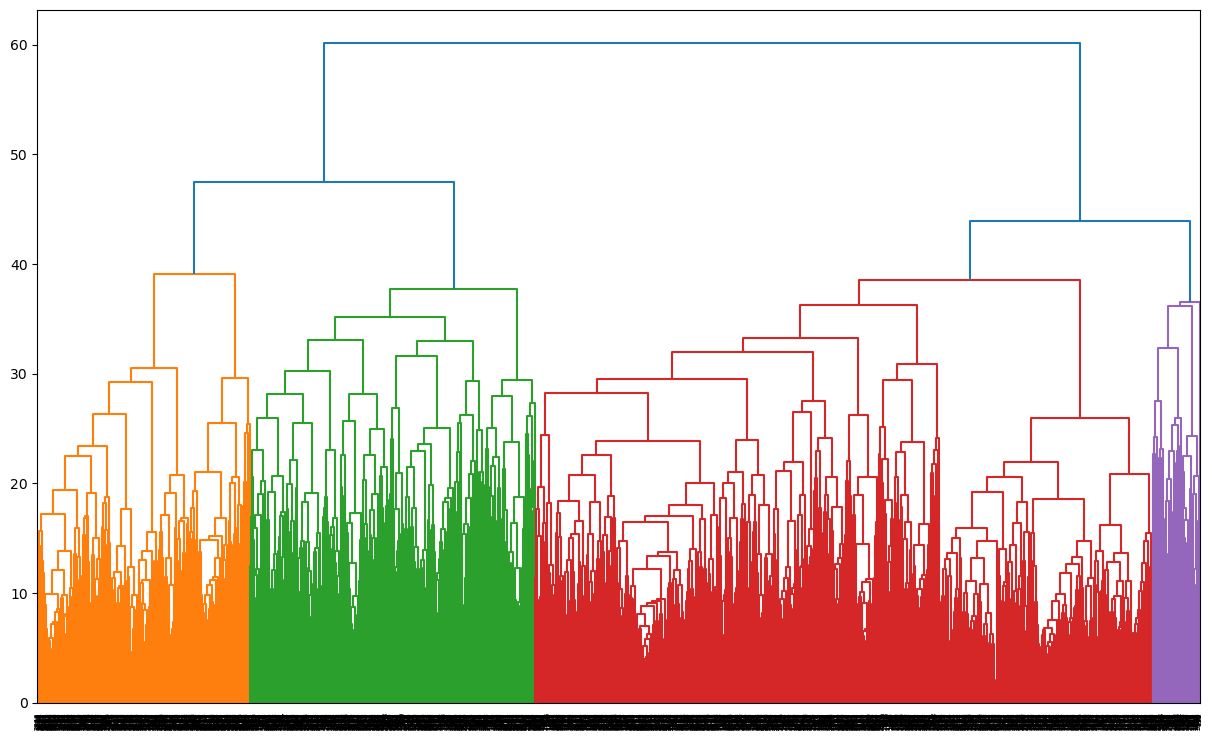

In [55]:
plt.figure(figsize=(15,9)) #인치

dendrogram(linked,
          orientation='top',
          distance_sort='descending',
          show_leaf_counts=False)

plt.show()

### 4.2 실루엣 지수 확인해서 토픽 갯수 정하기

In [23]:
!pip install scikit-learn
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.6 MB/s  0:00:00 eta 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn] [scikit-learn]


In [106]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = cluster_model.fit_predict(list(df['vector']))

In [108]:
cluster_labels

array([2, 0, 0, ..., 1, 0, 2], dtype=int64)

In [59]:
score = silhouette_score(list(df['vector']), cluster_labels)
score

-0.007558178

In [113]:
#반복문으로 여러개 토픽 계산해서 실루엣 지수 그래프보기
s_score = []
for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    label = model.fit_predict(list(df['vector']))
    score = silhouette_score(list(df['vector']), label)
    s_score.append(score)

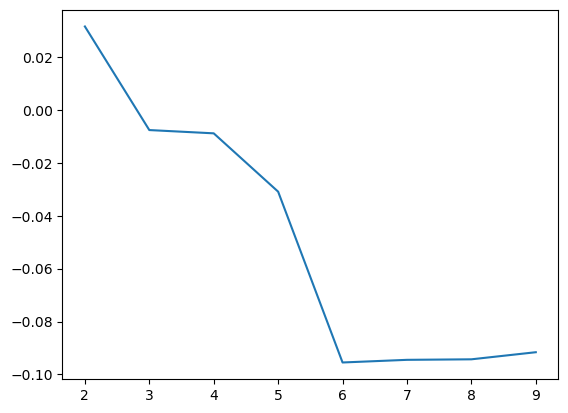

In [114]:
plt.plot(range(2,10),s_score)

In [117]:
s_result = pd.DataFrame({'n_cluster':range(2,10), 'score':s_score})
s_result

,n_cluster,score
0,2,0.031635
1,3,-0.007558
2,4,-0.008797
3,5,-0.030867
4,6,-0.095497
5,7,-0.094498
6,8,-0.094301
7,9,-0.091616


### 4.3 가장 적절한 클러스터링 갯수 df에 삽입

In [64]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = cluster_model.fit_predict(list(df['vector']))

In [65]:
cluster_labels

array([2, 1, 3, ..., 0, 1, 2], dtype=int64)

In [66]:
df['cluster'] = cluster_labels

In [67]:
df

,Date,Name,Score,Review,like,re_review,tagged_review,vector,cluster
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,"[시스템, 에어컨, 대다, 연결하다, 격, 제어, 사용, 에어컨, 기능, 공기청정기...","[-0.30007085, -0.4546936, 1.1461264, -1.37467,...",2
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,"[인덕션, 제어, 용, 사용, 끄다, 전용, 건, 좋다, 격, 제어기, 능이, 계속...","[-1.1479983, -0.98295224, 0.65881485, -1.05129...",1
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,위례 사는 신혼 부부입니다. TV랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,"[위례, 살다, 신혼, 부부, 공기청정기, 자다, 연동, 걸리다, 않다, 문제, 김...","[2.7407956, -0.14221147, -1.2591997, 1.8564236...",3
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.96180373, -0.03830146, -0.68201995, -0.468...",1
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 추가, 수, 건조, 완료, 후, ...","[0.6561136, -0.93339473, -0.40496543, -0.45242...",3
...,...,...,...,...,...,...,...,...,...
3463,2018년 3월 1일,이회용,5,디자인 너무 이뻐요. 단순해서 더 좋구요,0,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[0.04648971, 0.08567434, 0.04798103, 0.1091906...",1
3464,2017년 5월 18일,노래여왕,1,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,0,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[0.7911792, -0.15556675, -0.37034857, -0.25448...",1
3465,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,어플이 더위먹었나? 잘되다가 안되네...,"[어플, 더위, 먹다, 안되다]","[-0.030880047, -0.22810432, -0.122361846, 0.30...",0
3466,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,짱!! 밖에 나가도 되니까 진짜 좋아요!,"[짱, 나가다, 진짜, 좋다]","[0.47834617, -0.23259656, -0.56771076, 0.09145...",1


In [74]:
import pickle

with open('df_save.pkl', 'wb') as f:
    pickle.dump(df, f)

In [82]:
with open('df_save.pkl', 'rb') as f:
    df2 = pickle.load(f)

# ◆ 5. 해석하기:TF-IDF
* 문서 내에서 어떤 단어가 얼마나 중요한지를 평가하는 데 사용되는 방법
* 5.1 TF-IDF 계산
* 5.2 데이터프레임으로 만들고 정렬하기

### 5.1 TF-idf 계산
* 각 클러스터 마다 tfidf가 높은 워드들 찾기
* 각 클러스터들을 하나의 문서로 가정하여 tf-idf 값 추출

In [164]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
all_document = []

for i in range(0, 4): #0,1,2,3_클러스터의 수
    
    cluster_doc = '' #빈 문자열 작석
    pos_tagged = df[df['cluster']==i]['tagged_review'] #클러스터 별 형태소 분릭된 리스트 출력
    
    for i in pos_tagged:
        doc = ' '.join(i) + ' ' #띄어쓰기 기준으로 문자열 병합
        cluster_doc = cluster_doc+doc
        
    all_document.append(cluster_doc)

In [156]:
len(all_document)

4

In [170]:
#TF-IDF 벡터라이저 생성
vectorizer = TfidfVectorizer()

In [174]:
tfidf_matrix=vectorizer.fit_transform(all_document)

In [178]:
#단어 확인하기
names = vectorizer.get_feature_names_out()
names

array(['가게', '가격', '가구', ..., '힘드다', '힘들다', '힘쓰다'], dtype=object)

In [182]:
#점수 확인하기
tfidf_score = tfidf_matrix.toarray()
tfidf_score

array([[0.        , 0.00358613, 0.        , ..., 0.00438635, 0.        ,
        0.        ],
       [0.00113715, 0.002258  , 0.        , ..., 0.00276186, 0.00460309,
        0.        ],
       [0.00269269, 0.00089113, 0.00170767, ..., 0.00326995, 0.00871985,
        0.        ],
       [0.        , 0.00359537, 0.        , ..., 0.        , 0.00879531,
        0.00688977]])

In [186]:
#데이터 프레임화
tf_idf_df = pd.DataFrame(tfidf_score, columns=names)
tf_idf_df

,가게,가격,가구,가기,가까워지다,가까이,가깝다,가끔,가끔버벅되,가나,...,흥해랏,희다,희망,흰색,히스토리,히키,힘내다,힘드다,힘들다,힘쓰다
0,0.000000,0.003586,0.000000,0.000000,0.000000,0.000000,0.000000,0.002391,0.000000,0.001195,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.004386,0.000000,0.00000
1,0.001137,0.002258,0.000000,0.000000,0.001442,0.001137,0.002274,0.011290,0.001442,0.000753,...,0.001442,0.001137,0.001137,0.00000,0.00000,0.001442,0.000000,0.002762,0.004603,0.00000
2,0.002693,0.000891,0.001708,0.006831,0.000000,0.001346,0.005385,0.004456,0.000000,0.002673,...,0.000000,0.002693,0.002693,0.00000,0.00000,0.000000,0.001708,0.003270,0.008720,0.00000
3,0.000000,0.003595,0.000000,0.000000,0.000000,0.000000,0.000000,0.010786,0.000000,0.003595,...,0.000000,0.000000,0.000000,0.00689,0.00689,0.000000,0.000000,0.000000,0.008795,0.00689


In [192]:
tf_idf_df_T=tf_idf_df.T
tf_idf_df_T

,0,1,2,3
가게,0.000000,0.001137,0.002693,0.000000
가격,0.003586,0.002258,0.000891,0.003595
가구,0.000000,0.000000,0.001708,0.000000
가기,0.000000,0.000000,0.006831,0.000000
가까워지다,0.000000,0.001442,0.000000,0.000000
...,...,...,...,...
히키,0.000000,0.001442,0.000000,0.000000
힘내다,0.000000,0.000000,0.001708,0.000000
힘드다,0.004386,0.002762,0.003270,0.000000
힘들다,0.000000,0.004603,0.008720,0.008795


### 5.2 데이터프레임으로 만들고 정렬하기

In [196]:
tf_idf_df_T[0].sort_values(ascending=False)

안되다     0.557045
등록      0.412405
연결      0.388497
제품      0.284499
와이파이    0.181697
          ...   
보임      0.000000
보증      0.000000
보지      0.000000
보통      0.000000
힘쓰다     0.000000
Name: 0, Length: 3907, dtype: float64

In [202]:
for i in tqdm(tf_idf_df_T.columns):
    data = tf_idf_df_T[i].sort_values(ascending=False)

    #데이터프레임 모양으로 변환 
    data_dict = {'word': data.index, 'tf-idf' : data.values}
    data_df = pd.DataFrame(data_dict)

    #저장
    data_df.to_csv('cluster{}_tfidf.csv'.format(i), encoding = 'utf-8-sig')

100%|██████████| 4/4 [00:00<00:00, 83.05it/s]
